In [3]:
#Usually not neccessary to import the below libraries on google colab but i just use it not to forget its needed on jupitar notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#Loading of dataset#

from google.colab import files
uploaded = files.upload()


Saving Dataset.csv to Dataset (1).csv


In [9]:
df = pd.read_csv('Dataset.csv')
df.head()


,OrderID,Date,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19


In [19]:
#Data Cleaning
# Check for missing values
print(df.isnull().sum())

#Check data types
print(df.dtypes)

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for duplicates
df = df.drop_duplicates()

OrderID        0
Date           0
CustomerID     0
Product       10
Quantity       0
Price          0
Total          6
dtype: int64
OrderID                int64
Date          datetime64[ns]
CustomerID            object
Product               object
Quantity               int64
Price                  int64
Total                float64
dtype: object


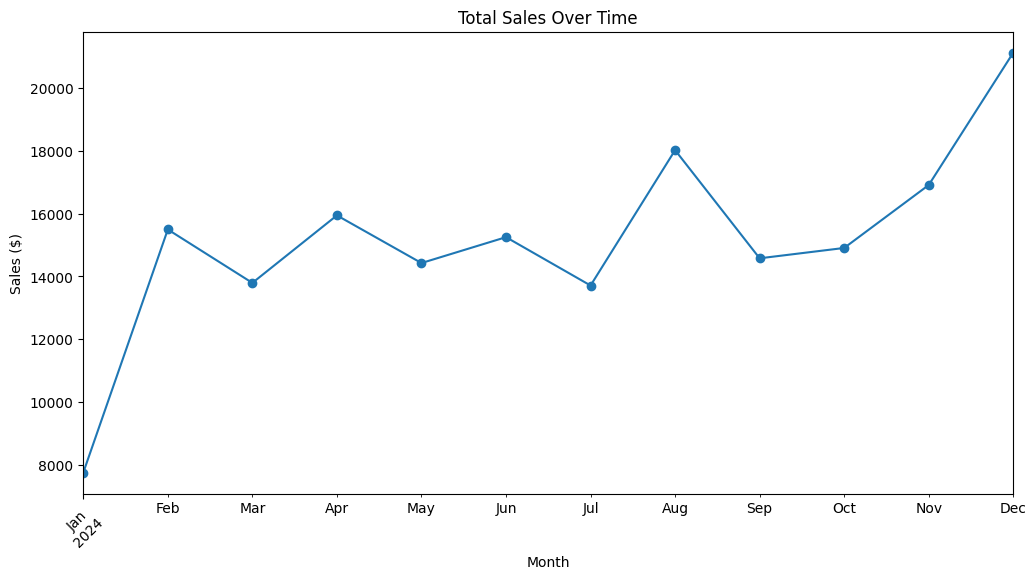

In [20]:
 #Exploratory Data Analysis (EDA)
 df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total'].sum()

monthly_sales.plot(kind='line', figsize=(12,6), marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.show()


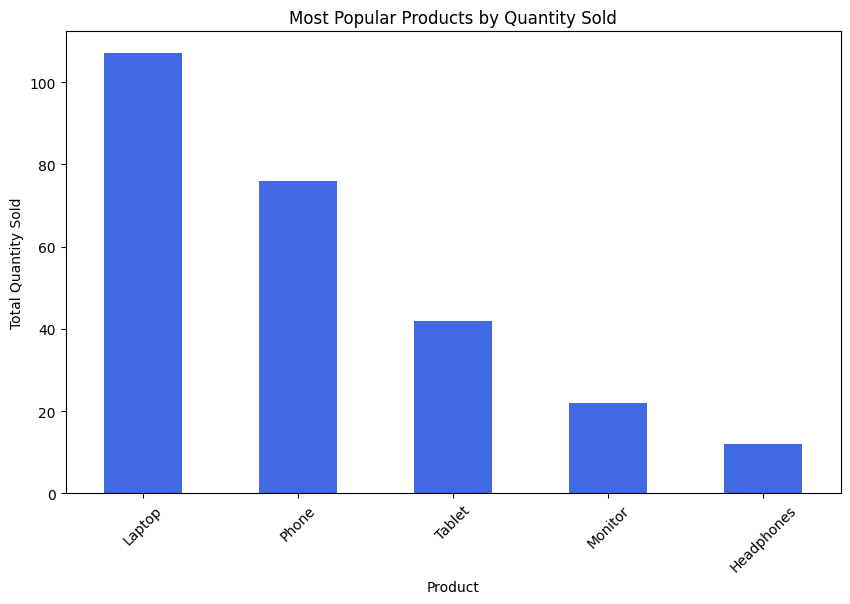

In [23]:
#Most Popular Products
top_products = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)

top_products.plot(kind='bar', figsize=(10,6), color='royalblue')
plt.title('Most Popular Products by Quantity Sold')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

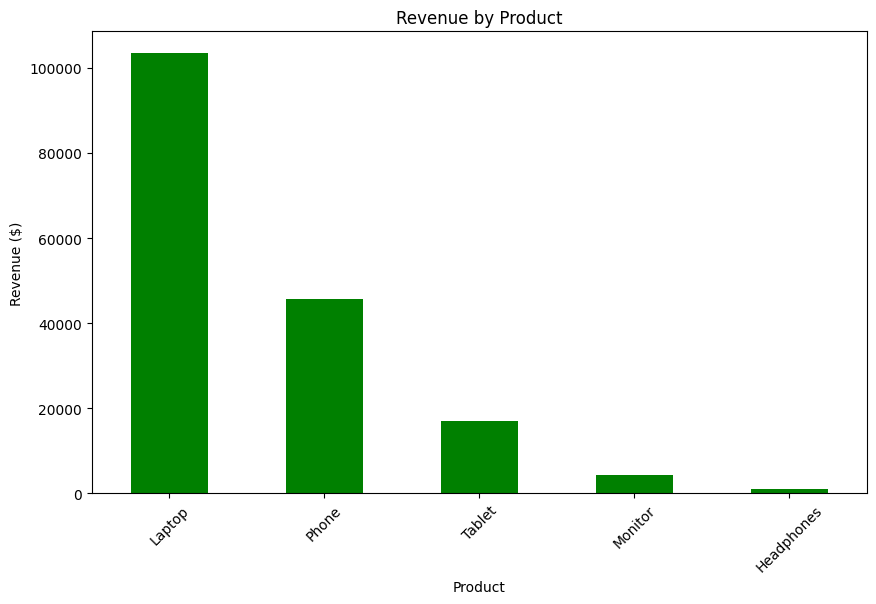

In [25]:
#Highest Revenue-Generating Products
revenue_by_product = df.groupby('Product')['Total'].sum().sort_values(ascending=False)

revenue_by_product.plot(kind='bar', figsize=(10,6), color='green')
plt.title('Revenue by Product')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.show()

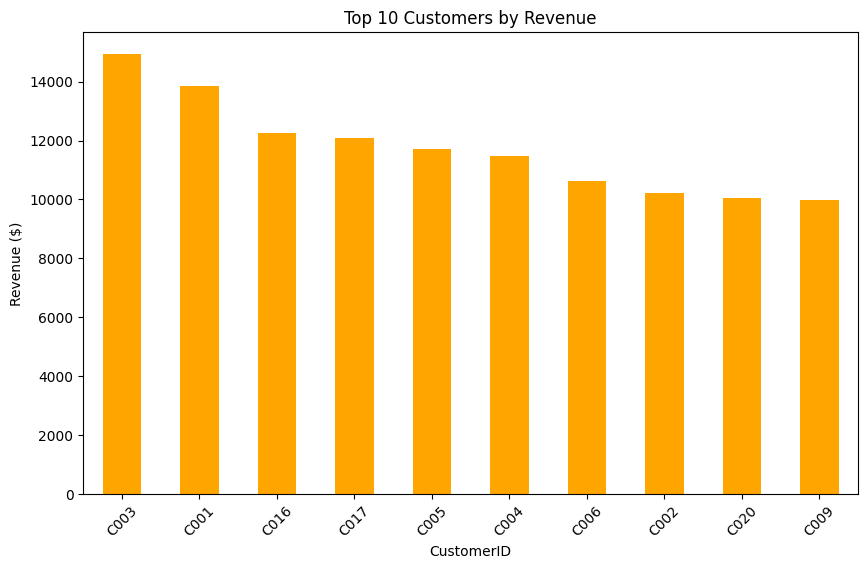

In [28]:
top_customers = df.groupby('CustomerID')['Total'].sum().sort_values(ascending=False).head(10)

top_customers.plot(kind='bar', figsize=(10,6), color='orange')
plt.title('Top 10 Customers by Revenue')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.show()